# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [1]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
*Image from http://www.learner.org/courses/againstallodds/about/glossary.html. Note this image uses $\alpha$ and $\beta$ instead of $\beta_0$ and $\beta_1$.*

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i^2 = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - N \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i = 0 \\
& N \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{N} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{N} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{N} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i (y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N x_i (y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N (x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x}\sum_{i=1}^N x_i - \hat{\beta}_1 \sum_{i=1}^N x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [2]:
import pandas as pd

bos = pd.read_csv('boston.csv')
print(bos.shape)
bos.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's rename the target variable of `MEDV` to `PRICE` which will contain the prices. 

In [3]:
bos = bos.rename(columns={"MEDV":"PRICE"})
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [4]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

Text(0.5, 1.0, 'Relationship between CRIM and Price')

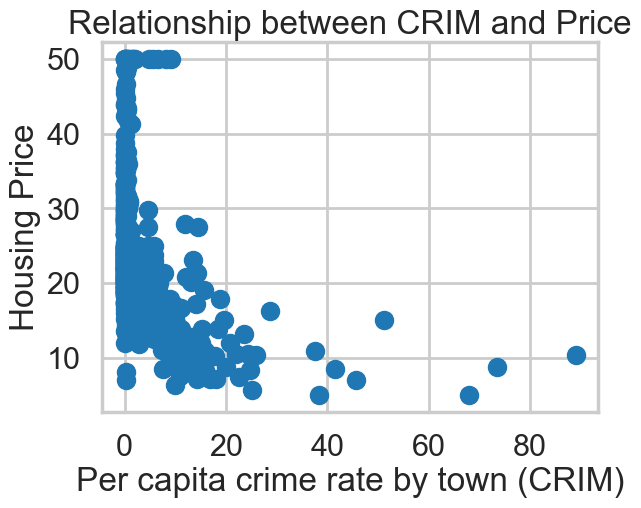

In [5]:
plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

In [ ]:
# your turn: describe relationship
# The plot suggests a general negative relationship between crime rate and housing price, 
# meaning that higher crime rates tend to be associated with lower housing prices. 
# However, the relationship is not linear — many of the points with lower crime rates have higher housing prices,
# but there are also variations in the middle and higher crime ranges.

# Outliers: 
# There are several outliers, especially for high CRIM values where a few areas have significantly higher crime rates 
# (CRIM > 50) and relatively lower housing prices (below 10). These could indicate a few areas with exceptionally 
# high crime, affecting property values

# Cluster at Low Crime Rate:
# The majority of the points are concentrated around low crime rates (CRIM < 10), with a wide range of housing prices.
# This indicates that most towns have lower crime rates but varying housing prices.

# The graph illustrates the dynamics between safety (as represented by crime rate) and housing prices. 
# In most towns where the crime rate is low, housing prices are relatively higher, indicating a preference for 
# safer neighborhoods. However, some towns with lower crime rates still have lower house prices, suggesting that
# factors other than crime influence these values as well.

Text(0.5, 1.0, 'Relationship between RM and Price')

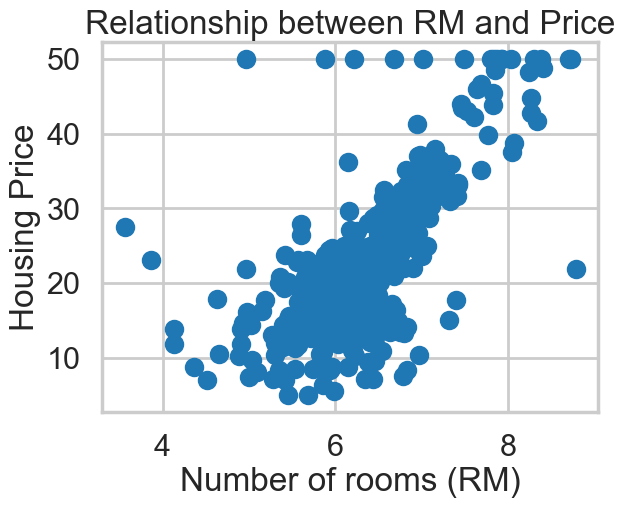

In [6]:
# your turn: scatter plot between *RM* and *PRICE*
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel("Number of rooms (RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")

In [ ]:
# Positive Linear Relationship: 
# As the number of rooms increases, housing prices generally increase as well. 
# This is a clear linear trend, indicating that homes with more rooms tend to be priced higher, which makes sense as 
# larger homes are typically more expensive.

# Concentration of Data: 
# Most of the data points are concentrated between 5 and 7 rooms, with prices ranging from about 10 to 50. 
# This suggests that most homes in the dataset have around 5 to 7 rooms, and there's a wide spread in housing 
# prices for homes in this range

# Outliers: 
# There are a few outliers, such as homes with around 3 or 4 rooms but relatively high prices, as well as homes 
# with 8 rooms but prices that vary widely from around 20 to 50. These outliers may represent luxury homes or 
# unique properties that don't follow the general trend.

# This plot tells a straightforward story: the more rooms a house has, the higher its price is likely to be. 
# Most homes fall within the 5-7 room range, with a steady increase in prices as room numbers increase. 
# However, there are a few exceptions, suggesting that a number of rooms isn't the only factor influencing housing 
# prices—other features like location, property size, or amenities could also play a role.

Text(0.5, 1.0, 'Relationship between PTRATIO and Price')

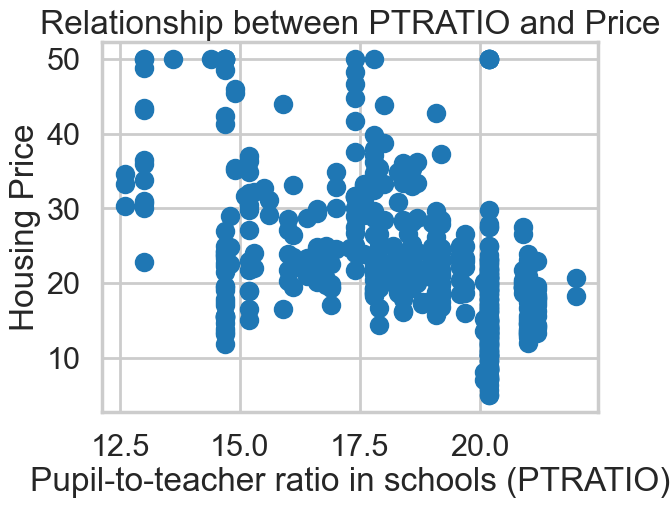

In [7]:
# your turn: scatter plot between *PTRATIO* and *PRICE*
plt.scatter(bos.PTRATIO, bos.PRICE)
plt.xlabel("Pupil-to-teacher ratio in schools (PTRATIO)")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")

In [ ]:
# Weak Negative Relationship: 
# There seems to be a weak negative relationship between PTRATIO and housing prices. 
# In general, higher pupil-to-teacher ratios (indicating larger class sizes) are associated with lower housing prices, 
# though the trend is not as strong or clear as in the previous scatter plots

# Cluster of Data: 
# Most of the data points are concentrated between pupil-to-teacher ratios of 15 and 20, 
# and within this range, housing prices vary widely from about 10 to 50. This suggests that in many towns, the PTRATIO 
# does not have a very strong influence on housing prices.

# Outliers: 
# There are several high-price outliers (with prices close to 50) across the entire PTRATIO range, indicating that 
# some towns with higher class sizes still maintain very high housing prices. Conversely, a few towns with lower 
# PTRATIO values (closer to 12.5) have lower housing prices, which is somewhat unexpected given the general trend.

# The plot suggests that while towns with better school conditions (lower PTRATIO) may have higher housing prices, 
# the relationship is not strong enough to make definitive conclusions. Other factors, such as the neighborhood’s 
# reputation, amenities, or the town's economic status, might play a more significant role in determining housing prices, 
# especially in areas where class size isn't the sole determinant of school quality.

Text(0.5, 1.0, 'Relationship between ZN and Price')

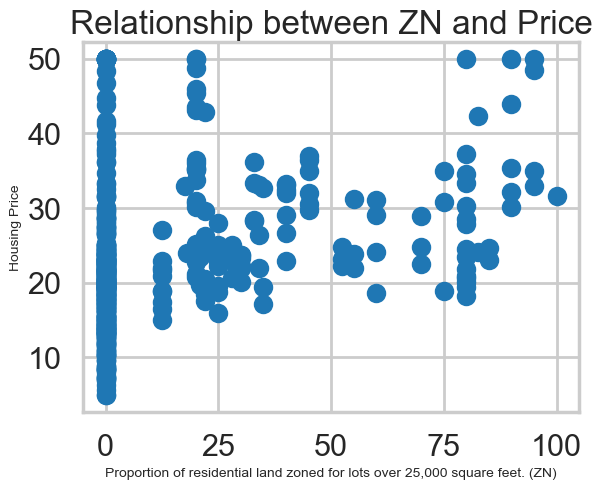

In [13]:
# your turn: create some other scatter plots
plt.scatter(bos.ZN, bos.PRICE)
plt.xlabel("Proportion of residential land zoned for lots over 25,000 square feet. (ZN)", fontsize=10)
plt.ylabel("Housing Price", fontsize=10)
plt.title("Relationship between ZN and Price")

In [14]:
# No clear relationship between Zoning and Pricing

Text(0.5, 1.0, 'Relationship between INDUS and Price')

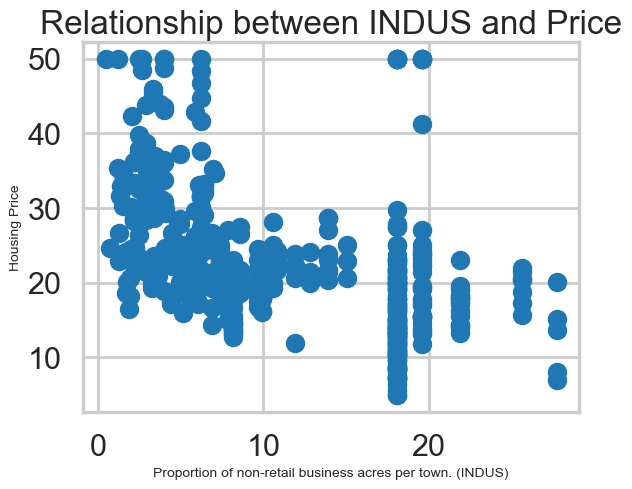

In [15]:
plt.scatter(bos.INDUS, bos.PRICE)
plt.xlabel("Proportion of non-retail business acres per town. (INDUS)", fontsize=10)
plt.ylabel("Housing Price", fontsize=10)
plt.title("Relationship between INDUS and Price")

Weak Negative Trend: There appears to be a weak negative trend between the proportion of non-retail business acres (INDUS) and housing prices. As the proportion of industrial business acreage increases, housing prices tend to decrease slightly, though the relationship is not very strong or linear. <br>
The plot suggests that higher industrial zoning (more non-retail business acres per town) may have a slight negative impact on housing prices. This might be due to the reduced desirability of living near industrial areas. However, there are still a few outliers where housing prices remain high despite high industrial activity, indicating that other factors (like location or amenities) can outweigh the industrial influence in some cases.

Text(0.5, 1.0, 'Relationship between CHAS and Price')

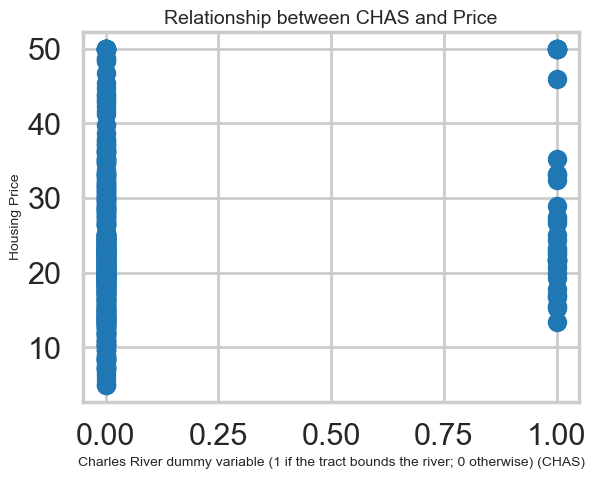

In [18]:
plt.scatter(bos.CHAS, bos.PRICE)
plt.xlabel("Charles River dummy variable (1 if the tract bounds the river; 0 otherwise) (CHAS)", fontsize=10)
plt.ylabel("Housing Price", fontsize=10)
plt.title("Relationship between CHAS and Price", fontsize=14)

The plot suggests that proximity to the Charles River positively affects housing prices, as homes in areas bordering the river (CHAS = 1) generally have higher prices. However, for homes not near the river (CHAS = 0), prices are more variable and influenced by a broader range of factors.

Text(0.5, 1.0, 'Relationship between NOX and Price')

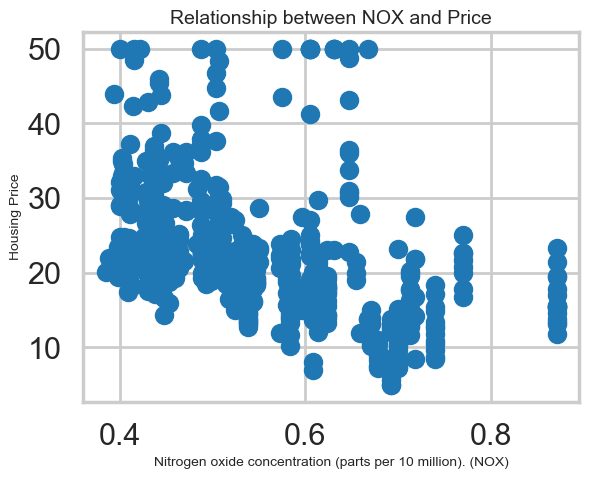

In [19]:
plt.scatter(bos.NOX , bos.PRICE)
plt.xlabel("Nitrogen oxide concentration (parts per 10 million). (NOX)", fontsize=10)
plt.ylabel("Housing Price", fontsize=10)
plt.title("Relationship between NOX and Price", fontsize=14)

The plot tells a clear story: higher nitrogen oxide levels (indicating more air pollution) are associated with lower housing prices. This suggests that environmental factors, such as air quality, have a noticeable impact on property values, with cleaner areas commanding higher prices.

Text(0.5, 1.0, 'Relationship between NOX and INDUS')

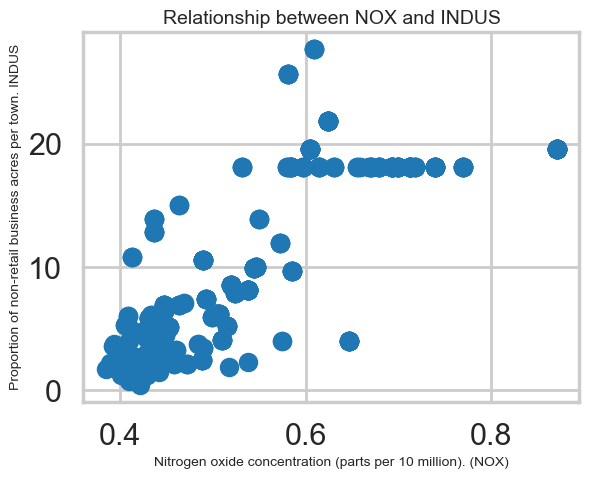

In [20]:
plt.scatter(bos.NOX , bos.INDUS)
plt.xlabel("Nitrogen oxide concentration (parts per 10 million). (NOX)", fontsize=10)
plt.ylabel("Proportion of non-retail business acres per town. INDUS", fontsize=10)
plt.title("Relationship between NOX and INDUS", fontsize=14)

This plot indicates that areas with more industrial land (high INDUS values) are associated with higher nitrogen oxide concentrations, confirming the expected relationship between industrialization and pollution. Towns with lower levels of industrialization generally have better air quality, whereas more industrialized towns tend to experience higher pollution levels.

Text(0.5, 1.0, 'Relationship between AGE and Price')

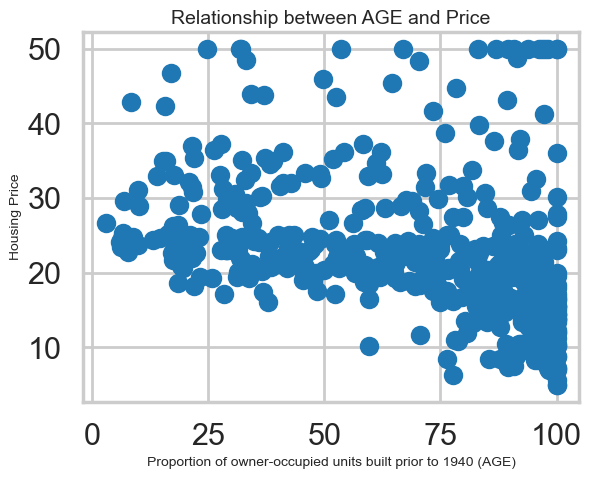

In [21]:
plt.scatter(bos.AGE , bos.PRICE)
plt.xlabel("Proportion of owner-occupied units built prior to 1940 (AGE)", fontsize=10)
plt.ylabel("Housing Price", fontsize=10)
plt.title("Relationship between AGE and Price", fontsize=14)

The plot suggests that towns with a higher proportion of older housing stock (built before 1940) tend to have lower housing prices on average. However, the relationship is not strong, and there is significant variation in housing prices, especially for areas with newer homes. Other factors like neighborhood amenities, location, and renovation efforts may play an important role in determining housing prices beyond the age of the homes.

Text(0.5, 1.0, 'Relationship between DIS and Price')

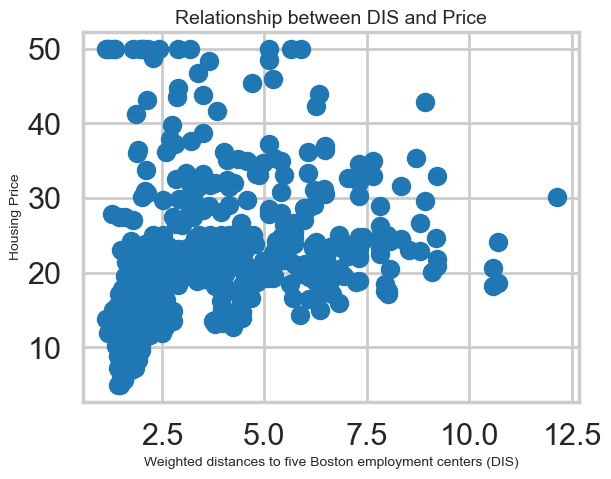

In [22]:
plt.scatter(bos.DIS , bos.PRICE)
plt.xlabel("Weighted distances to five Boston employment centers (DIS)", fontsize=10)
plt.ylabel("Housing Price", fontsize=10)
plt.title("Relationship between DIS and Price", fontsize=14)

The plot suggests that proximity to employment centers has some influence on housing prices, with homes farther from city centers tending to have slightly higher prices, possibly due to suburban or rural desirability. However, the relationship is not very strong, and other factors such as neighborhood characteristics or property size likely play a more significant role in determining housing prices.

Text(0.5, 1.0, 'Relationship between RAD and Price')

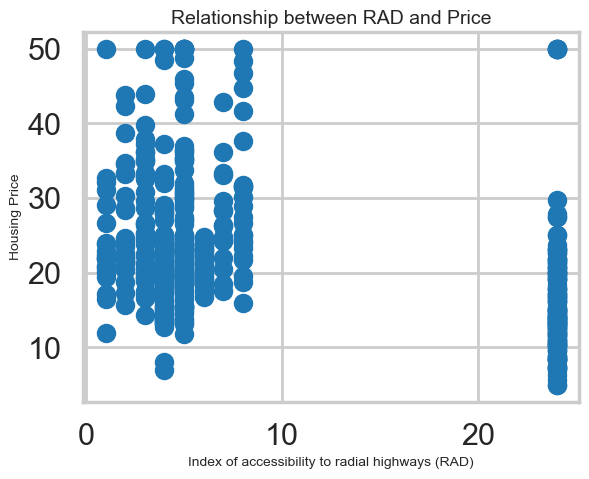

In [23]:
plt.scatter(bos.RAD , bos.PRICE)
plt.xlabel("Index of accessibility to radial highways (RAD)", fontsize=10)
plt.ylabel("Housing Price", fontsize=10)
plt.title("Relationship between RAD and Price", fontsize=14)

The plot suggests that while towns with better access to radial highways (lower RAD values) have a wide range of housing prices, higher RAD values (better access to highways) tend to correlate with lower housing prices. This could be due to less desirability in living near major roads, possibly due to traffic, noise, or other factors. However, some exceptions exist, with a few high-priced properties in highly accessible areas.

Text(0.5, 1.0, 'Relationship between TAX and Price')

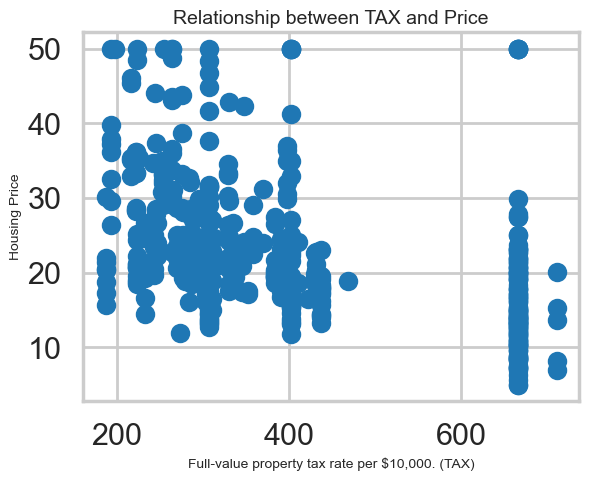

In [24]:
plt.scatter(bos.TAX , bos.PRICE)
plt.xlabel("Full-value property tax rate per $10,000. (TAX)", fontsize=10)
plt.ylabel("Housing Price", fontsize=10)
plt.title("Relationship between TAX and Price", fontsize=14)

The plot suggests that while higher property tax rates tend to be associated with lower housing prices, the relationship is not strict. Towns with lower tax rates have a wide range of housing prices, indicating that other factors like amenities, neighborhood quality, or proximity to important locations play a more significant role in determining housing prices. Conversely, in areas with higher property taxes, prices are more consistently lower, suggesting that high taxes may reduce housing demand.

Text(0.5, 1.0, 'Relationship between B and Price')

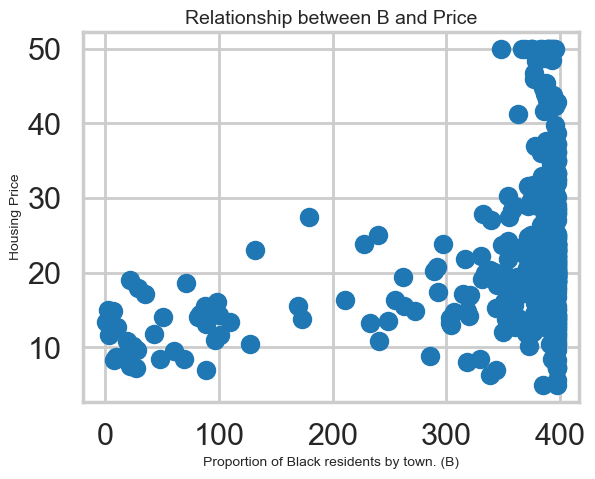

In [25]:
plt.scatter(bos.B , bos.PRICE)
plt.xlabel("Proportion of Black residents by town. (B)", fontsize=10)
plt.ylabel("Housing Price", fontsize=10)
plt.title("Relationship between B and Price", fontsize=14)

This plot suggests that there is no strong linear relationship between the proportion of Black residents in a town and housing prices. While towns with higher B values seem to have a wider range of housing prices, those with lower B values tend to have lower-priced homes. Other factors like location, amenities, and economic conditions may play more significant roles in influencing property prices than racial composition alone.

Text(0.5, 1.0, 'Relationship between LSTAT and Price')

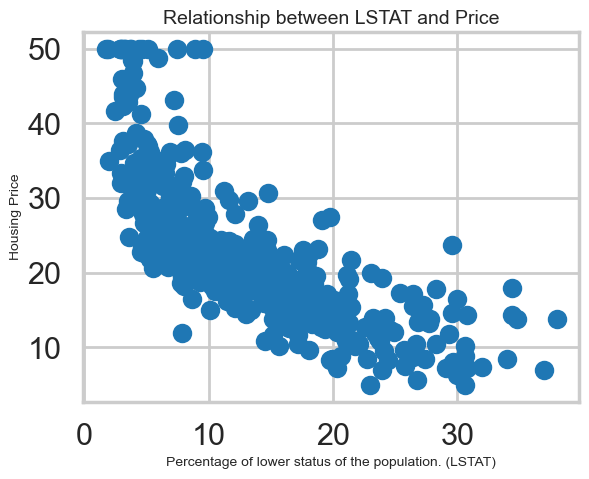

In [26]:
plt.scatter(bos.LSTAT , bos.PRICE)
plt.xlabel("Percentage of lower status of the population. (LSTAT)", fontsize=10)
plt.ylabel("Housing Price", fontsize=10)
plt.title("Relationship between LSTAT and Price", fontsize=14)

Strong Negative Correlation: 
There is a clear and strong negative correlation between LSTAT and housing prices. As the percentage of lower status of the population increases, housing prices tend to decrease. This relationship is quite evident and suggests that socioeconomic status plays a significant role in determining housing prices.<br>
<br>
This plot reveals a strong inverse relationship between the percentage of lower-status residents and housing prices. Areas with a lower percentage of lower-status populations tend to have higher-priced homes, while areas with higher percentages of lower-status populations see a sharp decline in housing prices. This socioeconomic factor is likely one of the most significant influences on housing prices within this dataset.


### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

<Axes: xlabel='RM', ylabel='PRICE'>

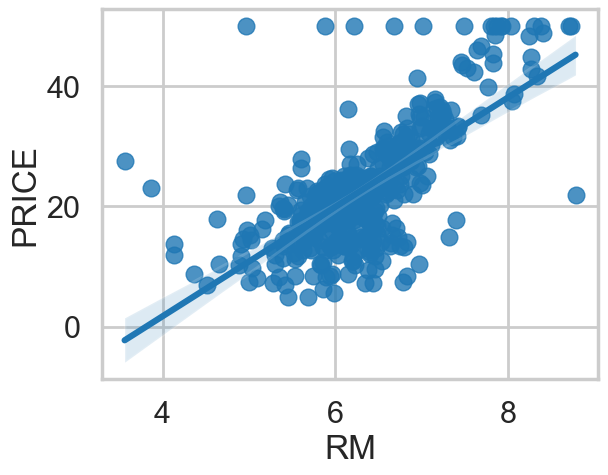

In [36]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

### Histograms
***


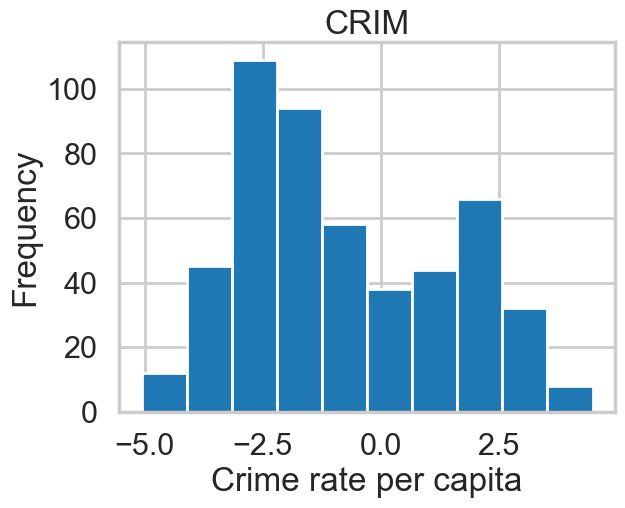

In [40]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequency")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>
</div>

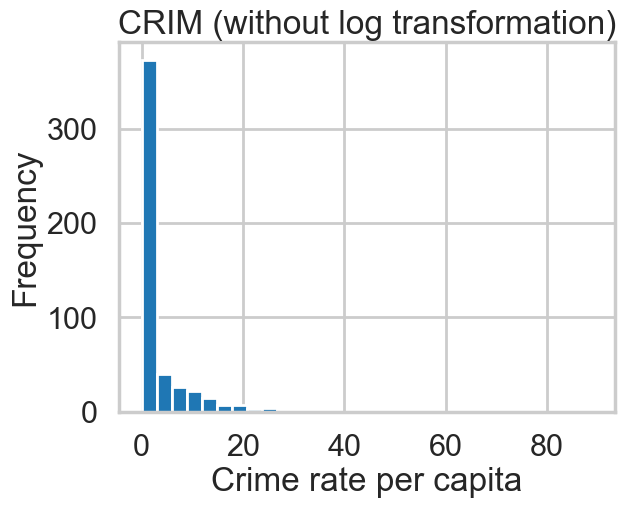

In [38]:
#your turn
plt.hist(bos.CRIM, bins=30)
plt.title("CRIM (without log transformation)")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequency")
plt.show()

Purpose of Logarithmic Transformation:
The primary purpose of taking the logarithm of the CRIM values is to normalize the data and make it more interpretable. CRIM may have highly skewed values, where a few towns have exceptionally high crime rates. By applying a logarithmic transformation, you can compress the range of the data and better visualize patterns or distributions that are otherwise obscured by extreme values.<br>
<br>
Effect of the Transformation:
<br>
Without the logarithmic transformation, the CRIM variable may be heavily right-skewed, with most towns having low crime rates and a few outliers with very high crime rates. This can make it difficult to observe the distribution of lower crime rates.
The log transformation "flattens" the range and spreads out the lower CRIM values, allowing you to observe the distribution more clearly and better understand the variation among towns with moderate or low crime rates.<br>
<br>
Insights from the Histogram:
<br>
After the transformation, the distribution appears to be more balanced, showing a more even spread of towns across different crime rate levels. The histogram shows that most towns cluster around lower crime rates (the bars near -2.5 and 0), while a few have higher crime rates, which are now more interpretable due to the logarithmic scale.<br>
<br>
What’s Not Obvious Without the Transformation:
<br>
Without the transformation, the histogram would likely show a heavily skewed distribution where most values are concentrated at the lower end, and the higher crime rates would dominate the chart, making it hard to analyze or interpret the overall distribution.

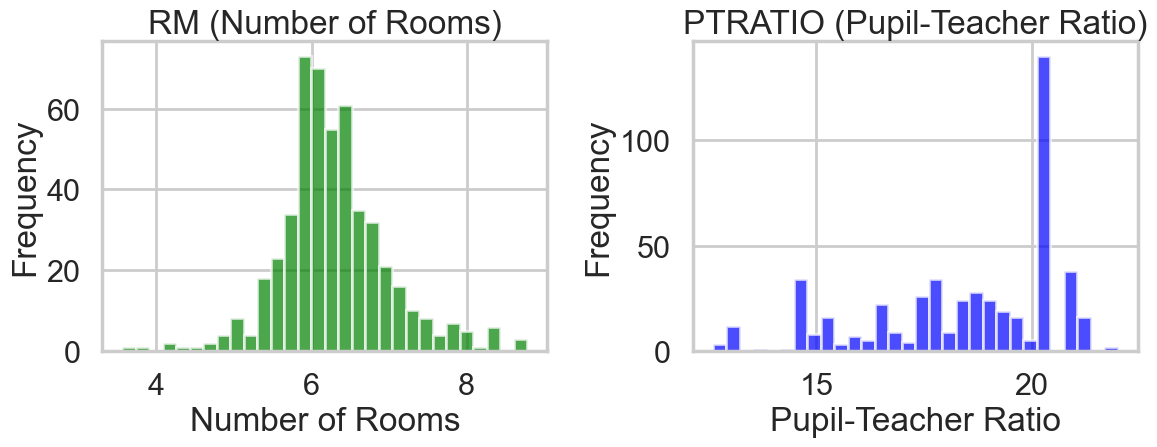

In [42]:
# Plot histogram for RM (number of rooms)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(bos.RM, bins=30, color='green', alpha=0.7)
plt.title("RM (Number of Rooms)")
plt.xlabel("Number of Rooms")
plt.ylabel("Frequency")

# Plot histogram for PTRATIO (pupil-teacher ratio)
plt.subplot(1, 2, 2)
plt.hist(bos.PTRATIO, bins=30, color='blue', alpha=0.7)
plt.title("PTRATIO (Pupil-Teacher Ratio)")
plt.xlabel("Pupil-Teacher Ratio")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

C:\Users\makar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\makar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\makar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\makar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

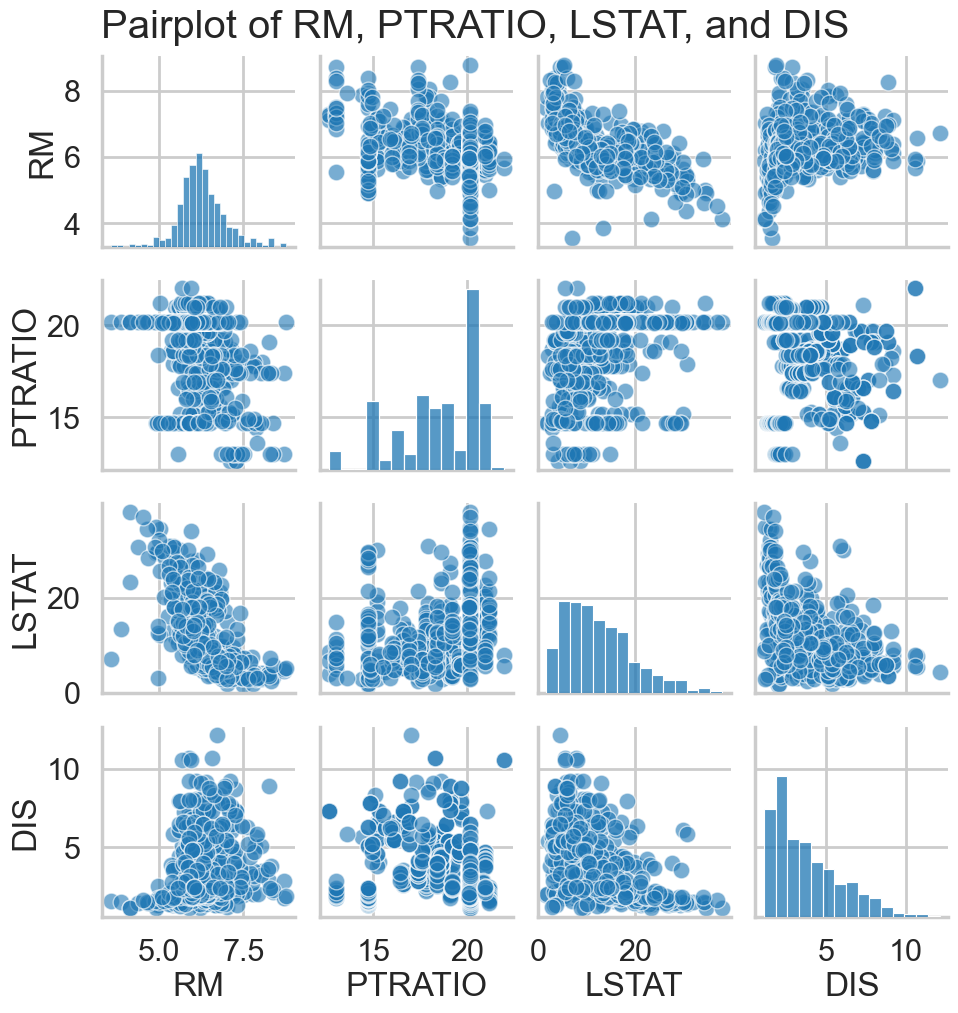

In [43]:
# Select the columns of interest: RM, PTRATIO, LSTAT, and DIS
data_subset = bos[['RM', 'PTRATIO', 'LSTAT', 'DIS']]

# Create a pairplot to explore correlations
sns.pairplot(data_subset, kind='scatter', diag_kind='hist', plot_kws={'alpha':0.6})
plt.suptitle('Pairplot of RM, PTRATIO, LSTAT, and DIS', y=1.02)
plt.show()

## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [44]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [45]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Fri, 04 Oct 2024   Prob (F-statistic):           2.49e-74
Time:                        11:22:53   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

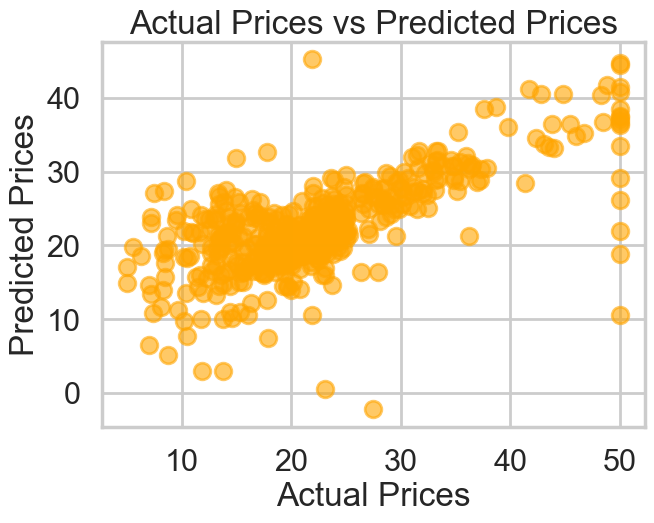

In [48]:
# your turn
predicted_prices = m.fittedvalues  # Predicted prices from the model
actual_prices = bos['PRICE']  # Actual prices

# Create a scatter plot for Actual Prices vs Predicted Prices
plt.figure(figsize=(7, 5))
plt.scatter(actual_prices, predicted_prices, alpha=0.6, color='orange')
plt.title("Actual Prices vs Predicted Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.grid(True)
plt.show()

Upward Trend: The upward trend shows that as actual housing prices increase, the predicted prices also increase. This suggests the model is capturing some of the relationship between the number of rooms (RM) and housing prices.

Variance in Prediction:
The model is better at predicting homes priced between **\$20,000** and **\$30,000**, as most of the points fall closer to the diagonal (ideal prediction line).
For homes priced below **\$20000** and above **\$30000**, the model shows more variance, suggesting less accurate predictions.
Underprediction for Higher Prices: The plot shows that higher-priced homes (those with actual prices closer to $50000) tend to be underpredicted by the model, as the predicted prices are consistently lower than the actual values.

Model’s Limitations: Since the model only uses the number of rooms (RM) to predict housing prices, it misses out on other influential variables like location, socioeconomic factors, or neighborhood characteristics. This might explain the spread of points and underprediction for certain price ranges.

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     306.4
Date:                Fri, 04 Oct 2024   Prob (F-statistic):          5.22e-113
Time:                        11:30:38   Log-Likelihood:                -1577.0
No. Observations:                 506   AIC:                             3162.
Df Residuals:                     502   BIC:                             3179.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8083      3.368      0.834      0.4

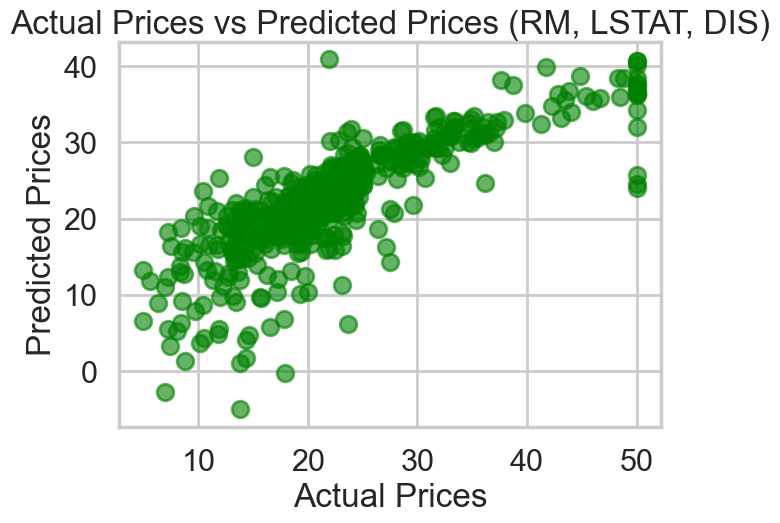

In [50]:
# Testing the model with LSTAT&DIS added

new_model = ols('PRICE ~ RM + LSTAT + DIS', bos).fit()

# Print the summary of the new model to assess the improvement
print(new_model.summary())

# Generate predicted values from the new fitted model
new_predicted_prices = new_model.fittedvalues

# Create the scatter plot for Actual Prices vs New Predicted Prices
plt.figure(figsize=(7, 5))
plt.scatter(bos['PRICE'], new_predicted_prices, alpha=0.6, color='green')
plt.title("Actual Prices vs Predicted Prices (RM, LSTAT, DIS)")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.grid(True)
plt.show()

### Fitting Linear Regression using `sklearn`


In [51]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression()

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [52]:
# Look inside lm object
# lm.<tab>

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [53]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

LinearRegression()

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).</p>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


1) In most cases, you would include an intercept unless you have strong theoretical reasons to exclude it (for example, when you believe that the line should pass through the origin). Excluding the intercept can lead to biased models if the true relationship between the dependent and independent variables doesn't pass through the origin.<br>
<br>
2) No, it is not enough for the residuals to be normally distributed. The residuals must be independently distributed and homoscedastic (constant variance). Normality of the residuals is important for hypothesis testing, but the assumptions of independence and equal variance are also critical to ensure the model is valid.<br>
<br>
3) False. The normality assumption applies to the residuals of the model, not to the dependent variable Y. Linear regression does not require Y to be normally distributed, but the residuals (errors) should be normally distributed for reliable hypothesis testing and confidence intervals.

In [54]:
# your turn
lm = LinearRegression(fit_intercept=False)
lm.fit(X, bos.PRICE)

LinearRegression(fit_intercept=False)

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [55]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 0.0


In [56]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [57]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.092897
1,ZN,0.048715
2,INDUS,-0.004060
3,CHAS,2.853999
4,NOX,-2.868436
5,RM,5.928148
6,AGE,-0.007269
7,DIS,-0.968514
8,RAD,0.171151
9,TAX,-0.009396


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [58]:
# first five predicted prices
lm.predict(X)[0:5]

array([29.09826353, 24.50227548, 31.22742641, 29.7071035 , 29.56479572])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

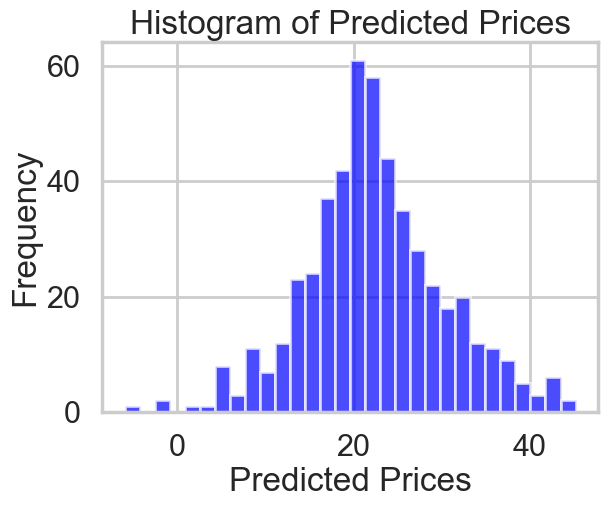

In [59]:
# your turn
predicted_prices = lm.predict(X)

# Plot the histogram of predicted prices
plt.hist(predicted_prices, bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Predicted Prices')
plt.xlabel('Predicted Prices')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Shape: The predicted prices are approximately bell-shaped with a peak around 20, indicating that the predictions are concentrated around this value. The distribution resembles a normal distribution, suggesting that the model's predictions are centered around a typical value.<br>
<br>

Center: The majority of predicted prices fall between 15 and 25, with the peak frequency (mode) around 20. This suggests that the model tends to predict housing prices within this mid-range most frequently.<br>
<br>
Spread: The predicted prices range from about 5 to 40, covering a wide range of possible values. There are fewer predictions for very low prices (close to 0) and very high prices (above 35).<br>
<br>
Outliers: There are very few predictions near the lower end (below 5), and the frequency sharply drops as the predicted prices move toward higher values (above 35). This could suggest that the model struggles to predict extremely low or extremely high prices, potentially because the dataset contains fewer homes in these ranges.

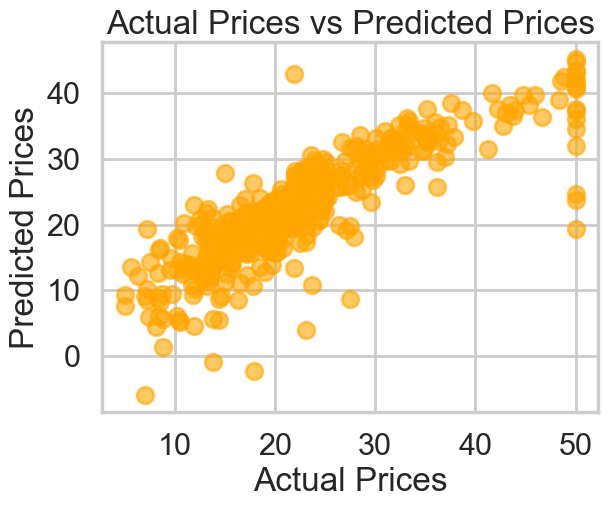

In [60]:
actual_prices = bos['PRICE']  # Replace 'bos' with your dataset if named differently

# Scatter plot of actual vs predicted prices
plt.scatter(actual_prices, predicted_prices, alpha=0.6, color='orange')
plt.title("Actual Prices vs Predicted Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.grid(True)
plt.show()

Scatterplot confirms observations from the histogram

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [61]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

12228.046261044004


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [63]:
print(np.sum((lm.predict(X) - np.mean(bos.PRICE)) ** 2))

31908.789708316377


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSE = \frac{RSS}{N-K-1}$$

$$MSR = \frac{ESS}{K}$$

**Remember:** Notation may vary across resources particularly the use of $R$ and $E$ in $RSS/ESS$ and $MSR/MSE$. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

In [64]:
# your turn
X_ptratio = bos[['PTRATIO']]
y = bos['PRICE']

lm_ptratio = LinearRegression()
lm_ptratio.fit(X_ptratio, y)

# Print intercept and coefficient
print(f"Intercept: {lm_ptratio.intercept_}")
print(f"Coefficient for PTRATIO: {lm_ptratio.coef_[0]}")

Intercept: 62.34462747483259
Coefficient for PTRATIO: -2.157175296060961


In [65]:
# R-squared value
r_squared = lm_ptratio.score(X_ptratio, y)
print(f"R-squared: {r_squared}")

R-squared: 0.257847318009223


In [66]:
# F-Statistic
X_ptratio_const = sm.add_constant(X_ptratio)  # Add constant for intercept
model = sm.OLS(y, X_ptratio_const).fit()

# Print the summary to get F-statistic
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Fri, 04 Oct 2024   Prob (F-statistic):           1.61e-34
Time:                        12:01:52   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.3446      3.029     20.581      0.0

Relationship Between F-statistic and t-statistic:
In simple linear regression, the square of the t-statistic for the coefficient is equal to the F-statistic. This is because, with a single predictor, the t-test and F-test both assess the significance of the predictor in explaining the response variable.<br>
We can observe this relationship by looking at the values in the summary output from statsmodels

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

In [67]:
# your turn
X_multi = bos[['CRIM', 'RM', 'PTRATIO']]
y = bos['PRICE']

# Fit the model using statsmodels
X_multi_const = sm.add_constant(X_multi)
model_multi = sm.OLS(y, X_multi_const).fit()

# Print the summary
print(model_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     245.2
Date:                Fri, 04 Oct 2024   Prob (F-statistic):           6.15e-98
Time:                        12:05:44   Log-Likelihood:                -1612.0
No. Observations:                 506   AIC:                             3232.
Df Residuals:                     502   BIC:                             3249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.3707      4.034     -0.836      0.4

F-statistic: 245.2 <br> The F-statistic tests whether our model as a whole is statistically significant (i.e., whether at least one of the predictors is related to the target variable).

R-squared: 0.594<br>
The R-squared value, provided in the summary output, tells us how much of the variance in housing prices is explained by the three predictors (CRIM, RM, and PTRATIO). A higher R-squared value indicates a better fit.

CRIM, RM, and PTRATIO are statistically significant<br>
RM (Number of Rooms) has the most substantial positive impact on housing prices, indicating that homes with more rooms are priced significantly higher.<br>
CRIM (Crime Rate) has a negative and significant relationship with housing prices, suggesting that higher crime rates drive down housing prices.<br>
PTRATIO (Pupil-Teacher Ratio) also has a negative impact, indicating that higher pupil-teacher ratios (fewer teachers per student) are associated with lower housing prices.<br>
<br>
The analysis reveals that housing prices are significantly influenced by the number of rooms, crime rates, and pupil-teacher ratios. Homes with more rooms are valued higher, with each additional room contributing substantially to the price. Conversely, higher crime rates and larger pupil-teacher ratios, indicative of lower-quality schooling, are associated with lower housing prices. This suggests that homebuyers prioritize both safety and educational quality when making purchasing decisions


## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

In [68]:
# Add another variable to the model (e.g., LSTAT and AGE)
X_full = bos[['CRIM', 'RM', 'PTRATIO', 'LSTAT', 'AGE']]

# Fit the model with the additional variable(s)
X_full_const = sm.add_constant(X_full)
model_full = sm.OLS(y, X_full_const).fit()

# Print summary of the full model
print(model_full.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     215.9
Date:                Fri, 04 Oct 2024   Prob (F-statistic):          2.24e-122
Time:                        12:16:42   Log-Likelihood:                -1549.2
No. Observations:                 506   AIC:                             3110.
Df Residuals:                     500   BIC:                             3136.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.5695      3.985      4.409      0.0

Full Model: Adding LSTAT and AGE improves the model's overall fit, as reflected by the higher R-squared, lower AIC, and the inclusion of LSTAT as a significant predictor. The effect of AGE is small and not statistically significant, but it slightly enhances the model's predictive ability.<br>
<br>
Reduced Model: The reduced model focuses on the core predictors, and while its fit is not as strong as the full model, it remains a simpler model with fewer variables.<br>
<br>
The full model with LSTAT and AGE is a better model overall, but if simplicity and interpretability are prioritized, the reduced model could still be considered valuable. The choice between these models depends on the context and the need for model complexity.


## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

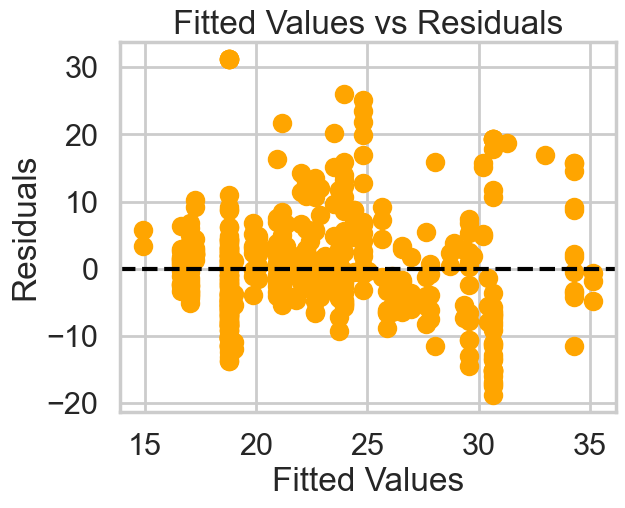

In [70]:
# Your turn.
# Fitted values (predicted values)
fitted_vals = model.fittedvalues

# Residuals
residuals = model.resid

# Plot fitted values vs residuals
plt.scatter(fitted_vals, residuals, color='orange')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Fitted Values vs Residuals')
plt.show()

 If the residuals are randomly scattered around zero, the assumption of homoscedasticity is satisfied. Patterns in the residuals (e.g., funnels) indicate heteroscedasticity, violating the assumptions.<br>
 <br>
 Residual Spread: The residuals are scattered around the zero line, but there appears to be some slight clustering, indicating that the model might not perfectly meet the assumption of homoscedasticity (constant variance of residuals). In particular, we see more variability in residuals for higher fitted values.<br>
<br>
No Clear Pattern: The residuals do not show any obvious systematic pattern (like a curve), which suggests that the model might be reasonably linear. However, the larger spread of residuals at higher values might indicate heteroscedasticity, meaning the variability in residuals increases with fitted values.<br>
<br>
Potential Outliers: There are a few residuals that are much larger (both positive and negative) than the others. These could potentially be outliers that are affecting the model's fit.

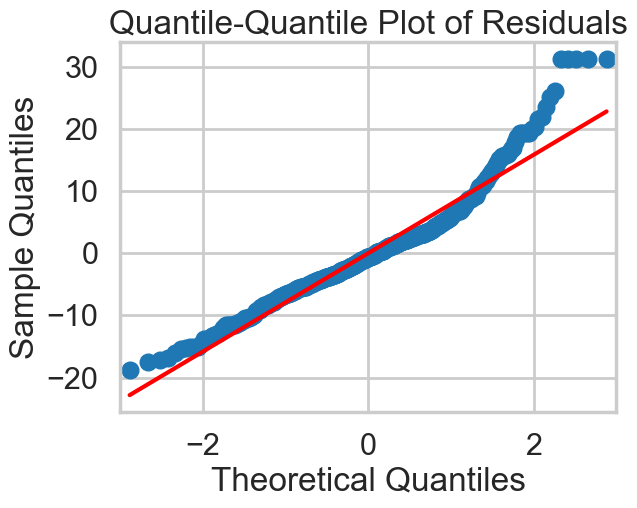

In [71]:
sm.qqplot(residuals, line='s')
plt.title('Quantile-Quantile Plot of Residuals')
plt.show()

If the residuals follow a normal distribution, they should closely follow the 45-degree line. Deviations from this line indicate non-normality in residuals.<br>
<br>
Deviation from Normality:<br>
Most of the residuals fall close to the red line, indicating that the residuals roughly follow a normal distribution.
However, the tails of the distribution deviate from the red line, especially on the higher quantile (right-hand side). This indicates the presence of a few large residuals that are not normally distributed, suggesting that there are some extreme values (potentially outliers).<br>
Potential Outliers:<br>
The points that significantly deviate from the red line, particularly at the extremes (both high and low quantiles), suggest that the model may have difficulty accurately predicting those cases. These could represent outliers in the data.
<br>
Normality Assumption:<br>
While most of the data conforms to normality, the deviations in the tails suggest that the normality assumption is somewhat violated. This may affect the reliability of hypothesis tests like the t-test or F-test.

**Fitted vs Residual Plot**<br>
**Advantages**:<br>
Detecting Non-linearity:<br>
This plot is useful for checking whether the relationship between the predictors and the outcome variable is linear. A systematic pattern in the residuals indicates non-linearity.<br>
<br>
Detecting Heteroscedasticity:<br>
It helps identify if the spread of residuals changes across levels of the fitted values, which indicates heteroscedasticity (non-constant variance).<br>
<br>
Highlighting Outliers:<br>
Extreme points that are far from the rest of the residuals can be easily spotted as potential outliers.<br>
<br>
**Disadvantages**:<br>
Does Not Directly Test Normality:<br>
This plot focuses more on the relationship between the fitted values and residuals but does not assess whether the residuals are normally distributed.<br>
<br>
Hard to Detect Subtle Issues:<br>
Subtle deviations from the normality assumption or other model issues might be harder to detect.

**Quantile-Quantile (Q-Q) Plot**<br>
**Advantages**:<br>
Assessing Normality:<br>
The Q-Q plot is ideal for assessing how closely the residuals follow a normal distribution. Deviations from the line indicate deviations from normality, especially in the tails.<br>
Easier Detection of Skewness and Kurtosis:<br>
It allows for a clearer visualization of whether the data is skewed or has heavy tails.<br>
<br>
**Disadvantages:**<br>
No Information on Non-linearity or Heteroscedasticity:<br>
Unlike the fitted vs residual plot, the Q-Q plot does not provide any information about whether the relationship between predictors and the target variable is linear or if there is heteroscedasticity.<br>
Less Intuitive for Non-Statisticians:<br>
It can be harder for non-statisticians to interpret compared to the residual plot, as the concept of quantiles and deviations from normality might not be as immediately obvious.


In summary, fitted vs residual plots are better for identifying issues with the model’s fit (non-linearity, heteroscedasticity, outliers), while Q-Q plots are better for checking if residuals are normally distributed, which is important for inference. Together, they provide a more complete diagnostic check for the model.

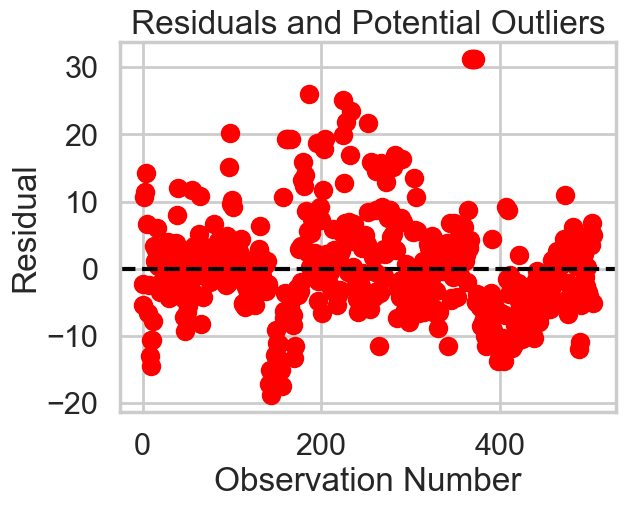

Outliers:
 186    26.053093
225    25.190223
368    31.230314
369    31.230314
370    31.230314
371    31.230314
372    31.230314
dtype: float64


In [74]:
# Plot residuals and identify outliers
plt.scatter(range(len(residuals)), residuals, color='red')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals and Potential Outliers')
plt.xlabel('Observation Number')
plt.ylabel('Residual')
plt.show()

# Print large residuals as potential outliers
outliers = residuals[abs(residuals) > 3 * np.std(residuals)]
print("Outliers:\n", outliers)

Pattern: The residuals are scattered around the zero line, which is good, as this suggests the model doesn't show any systematic bias across the range of predicted values.<br>
<br>
Outliers:<br> Observations with residuals far from zero are highlighted as outliers. These may indicate that the model struggles to predict these points accurately due to reasons like:<br>
Unusual data points (e.g., properties with unique characteristics).<br>
Errors in data recording or input.<br>
Factors influencing price that are not captured by the model (like neighborhood trends, renovations, etc.).

Outliers can sometimes be informative, highlighting cases where the model’s assumptions may not hold or where additional variables could help explain the variance. However, extreme outliers can also skew model performance, so they may be candidates for exclusion in some cases.

The outliers in our model likely represent homes with unique circumstances. Some homes may be priced much higher than predicted due to luxury features, recent renovations, or location in a high-demand area. On the other hand, homes priced lower than expected could be fixer-uppers, in poor condition, or located near undesirable areas like industrial zones. In some cases, unusual sales circumstances—such as foreclosures or quick sales—might explain the discrepancies. These outliers highlight the limitations of our model in capturing every nuance of the housing market.

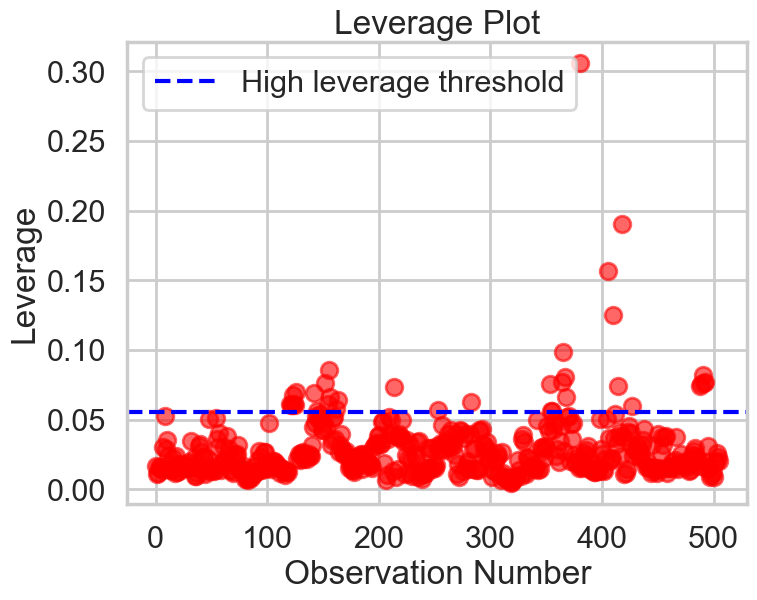

In [75]:
# Add a constant (for intercept) to the X data we have been using
X_with_const = sm.add_constant(X)

# Fit the model
model = sm.OLS(bos.PRICE, X_with_const).fit()

# Get influence measures
influence = model.get_influence()

# Leverage values
leverage = influence.hat_matrix_diag

# Construct the leverage plot
plt.figure(figsize=(8, 6))
plt.scatter(np.arange(len(leverage)), leverage, color='red', alpha=0.6)
plt.axhline(y=2 * np.mean(leverage), color='blue', linestyle='--', label='High leverage threshold')
plt.title('Leverage Plot')
plt.xlabel('Observation Number')
plt.ylabel('Leverage')
plt.legend()
plt.show()

High leverage points are data points that have extreme predictor values compared to the rest of the dataset. These points can disproportionately influence the direction of the regression line, meaning that even small changes in these observations could significantly change the model's parameters.

In our model, the high leverage points could indicate unusual neighborhoods or outliers in terms of crime rate, average number of rooms, pupil-teacher ratios, or other features in the dataset. These points may represent unique areas with different characteristics, such as high-end or low-end housing markets, or places with extreme values in some features like education or environmental factors.

It is important to assess these points carefully because, although they may seem like outliers, they might reflect real-world conditions. Removing them without a valid reason could skew the model. On the other hand, if they represent data entry errors or anomalies, removing them could improve the model's predictive performance.

In [80]:
outliers_and_leverage = [186, 225, 368, 369, 370, 371, 372, 364, 365, 367]
X_cleaned = X.drop(outliers_and_leverage, axis=0)
y_cleaned = y.drop(outliers_and_leverage, axis=0)

# Adding a constant to the model (intercept)
X_cleaned_const = sm.add_constant(X_cleaned)

# Fit the regression model
model_cleaned = sm.OLS(y_cleaned, X_cleaned_const).fit()

# Display the cleaned model summary
print(model_cleaned.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     161.3
Date:                Fri, 04 Oct 2024   Prob (F-statistic):          4.24e-166
Time:                        16:34:36   Log-Likelihood:                -1359.4
No. Observations:                 496   AIC:                             2747.
Df Residuals:                     482   BIC:                             2806.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.6873      4.422      4.226      0.0

The new regression results after removing the outliers and high leverage points show the following changes compared to the previous model:<br>
<br>
R-squared Value:

The R-squared value has improved from 0.683 (with outliers) to 0.813 (after removing outliers and leverage points).
This indicates that the model explains more of the variance in the housing prices after cleaning the data.
<br>
Significance of Variables:
<br>
Some variables that were previously not significant have now become significant:
ZN has a p-value of 0.006, meaning it is now statistically significant.
INDUS was not significant before and remains insignificant.
CHAS and NOX remain significant, but the t-statistics for NOX is much larger in magnitude, suggesting a stronger relationship.
<br>
Coefficient Values:
<br>
The magnitude of coefficients for some variables has changed:
RM (Number of rooms) is still significant and has a coefficient of 5.7999, slightly larger than before.
DIS shows a negative relationship with housing prices, with a slightly larger negative coefficient (-1.1539).
PTRATIO (Pupil-teacher ratio) has a slightly smaller coefficient than before.
<br>
Overall Model Improvement:
<br>
The AIC has decreased from 3110 (before) to 2747, indicating a better fit with fewer outliers and leverage points.
The model now provides more reliable coefficient estimates with a stronger overall fit, as indicated by the improved F-statistic and lower standard errors for many coefficients.
These changes suggest that removing the outliers and high leverage points led to a better-performing model that more accurately reflects the relationships between the predictors and housing prices.